# Capstone Project: Udacity Machine Learning Engineer
## Hans Fricke 2018
## Descriptive analysis

In [1]:
# import packages
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

In [2]:
# display formatting 
%matplotlib inline 
pd.options.display.float_format = '{:20,.2f}'.format

# change working directory
os.chdir("/Users/hansfricke/Dropbox/ND ML Engineer/Capstone")

In [3]:
data = pd.read_pickle('Data/final_data.pkl')

### Plot the distribution of the topic loadings by approval status

In [43]:
def compare_dist_plot(columns, dimensions, sizes, name, sharex=True):
    rows, cols = dimensions
    width, height = sizes
    f, axes = plt.subplots(rows, cols, figsize=(width, height), sharex=sharex)
    
    index = 0
     
    for r in range(rows):
        for c in range(cols):
            if rows == 1:
                axis = axes[c]
            elif cols == 1:
                axis = axes[r]
            else:
                axis = axes[r, c]
                
            if r == 0 and c == 0: 
                sns.distplot(data.loc[data.approved==1, columns[index]], 
                             hist=False, 
                             color="skyblue", 
                             ax=axis,
                             label='Approved')
                sns.distplot(data.loc[data.approved==0, columns[index]], 
                             hist=False, 
                             color="gold", 
                             ax=axis,
                             label='Not Approved')
                axis.legend()
            else:    
                sns.distplot(data.loc[data.approved==1, columns[index]], 
                             hist=False, 
                             color="skyblue", 
                             ax=axis)
                sns.distplot(data.loc[data.approved==0, columns[index]], 
                             hist=False, 
                             color="gold", 
                             ax=axis)
            index+=1    
    plt.savefig('./Graphs/' + name)

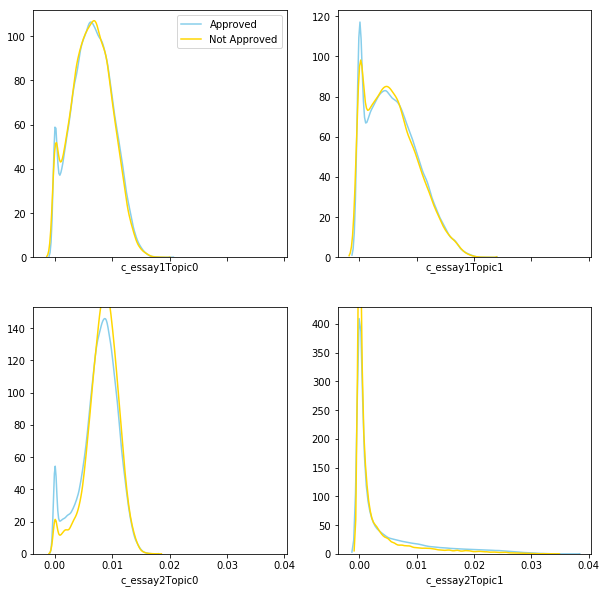

In [44]:
compare_dist_plot(columns=["c_essay1Topic0", 
                           "c_essay1Topic1", 
                           "c_essay2Topic0",
                           "c_essay2Topic1"], 
                  dimensions=(2,2), 
                  sizes = (10,10), 
                  name='Density_Topics')

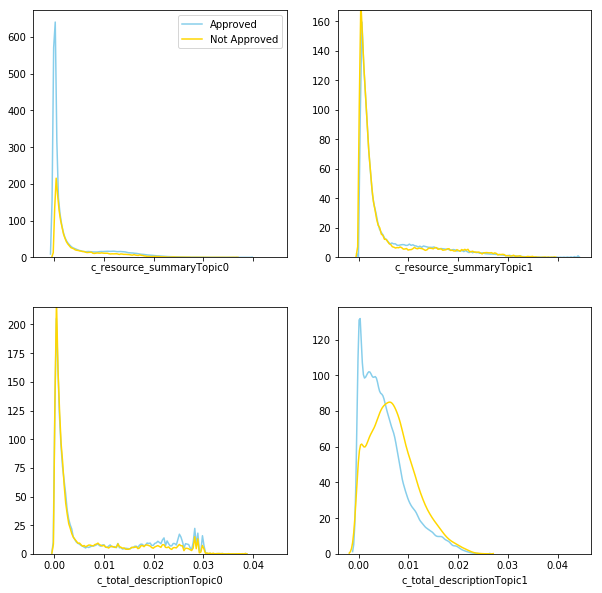

In [23]:
compare_dist_plot(columns=["c_resource_summaryTopic0", 
                           "c_resource_summaryTopic1", 
                           "c_total_descriptionTopic0",
                           "c_total_descriptionTopic1"], 
                  dimensions=(2,2), 
                  sizes = (10,10), 
                  name='Density_Topics_other')

### Plot the distribution of principal components

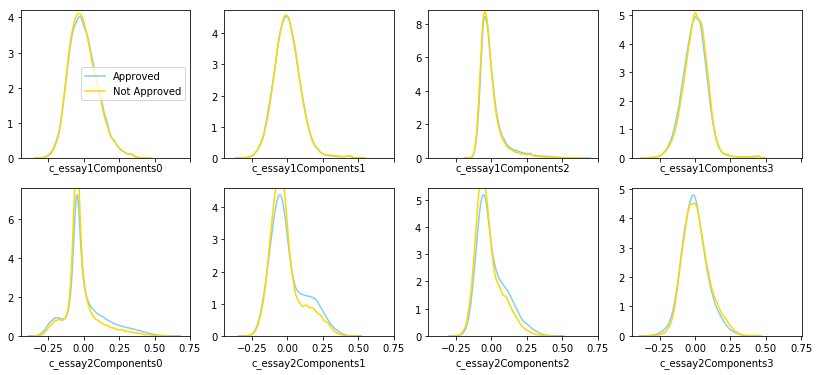

In [47]:
compare_dist_plot(columns=["c_essay1Components0", 
                           "c_essay1Components1", 
                           "c_essay1Components2",
                           "c_essay1Components3",
                           "c_essay2Components0",
                           "c_essay2Components1",
                           "c_essay2Components2",
                           "c_essay2Components3"], 
                  dimensions=(2,4), 
                  sizes = (14,6), 
                  name='Density_Components')

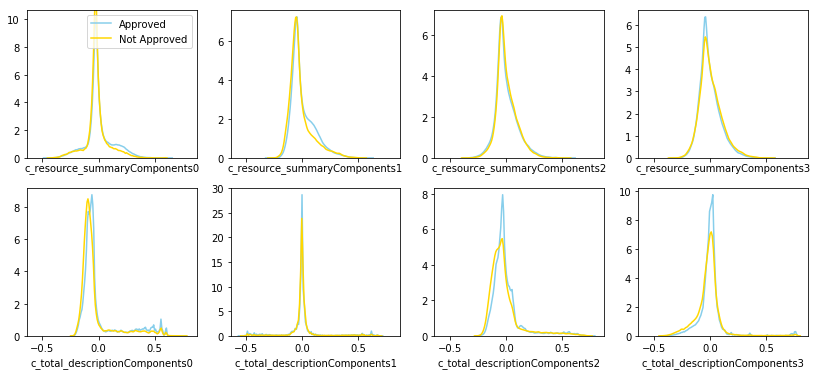

In [26]:
compare_dist_plot(columns=["c_resource_summaryComponents0", 
                           "c_resource_summaryComponents1", 
                           "c_resource_summaryComponents2",
                           "c_resource_summaryComponents3",
                           "c_total_descriptionComponents0",
                           "c_total_descriptionComponents1",
                           "c_total_descriptionComponents2",
                           "c_total_descriptionComponents3"], 
                  dimensions=(2,4), 
                  sizes = (14,6), 
                  name='Density_Components_Other')

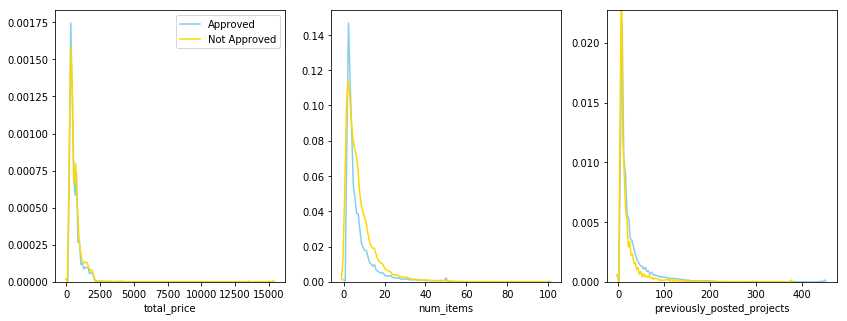

In [48]:
compare_dist_plot(columns=["total_price", 
                           "num_items", 
                           "previously_posted_projects"], 
                  dimensions=(1,3), 
                  sizes = (14,5), 
                  name='Density_Other',
                  sharex=False)

### Carry out means comparison with t-tests

In [103]:
def mean_comparison(columns, group, data):
    names = []
    means1 = []
    means0 = []
    t_stats = []
    difs = []
    p_values = []
    stars = []
    for var in features:
        mean1 = np.mean(data.loc[data[group]==1, var])
        mean0 = np.mean(data.loc[data[group]==0, var])
        dif = mean1 - mean0       
        t_stat, pvalue = ttest_ind(data.loc[data[group]==1, var], 
                           data.loc[data[group]==0, var], equal_var=False)
        star = ''
        if pvalue <0.1:
            star = '+'
        if pvalue <0.05:
            star = '*'  
        if pvalue <0.01:
            star = '**'      
        if pvalue <0.001:
            star ='***'
        means1.append(mean1)
        means0.append(mean0)
        difs.append(dif)
        p_values.append(pvalue)
        t_stats.append(t_stat)
        names.append(var)
        stars.append(star)

    stats = {'Var name': names,
            'Mean approved': means1,
            'Mean not approved': means0,
            'Difference (approved - not approved)': difs,
            't-statistic': np.abs(t_stats), 
            '': stars}
    stats_df = pd.DataFrame(stats)
    stats_df.sort_values('t-statistic', ascending=False, inplace=True)
    return stats_df[['Var name', 
                         'Mean approved', 
                         'Mean not approved', 
                         'Difference (approved - not approved)', 
                         't-statistic', 
                         '']]

In [104]:
features = [
 'previously_posted_projects',
 'Literacy&Language',
 'Music&TheArts',
 'SpecialNeeds',
 'Math&Science',
 'Health&Sports',
 'Care&Hunger',
 'History&Civics',
 'AppliedLearning',
 'Warmth',
 'Literacy',
 'SocialSciences',
 'Literature&Writing',
 'FinancialLiteracy',
 'AppliedSciences',
 'NutritionEducation',
 'Mathematics',
 'Music',
 'CharacterEducation',
 'Gym&Fitness',
 'Extracurricular',
 'PerformingArts',
 'CommunityService',
 'VisualArts',
 'ForeignLanguages',
 'EarlyDevelopment',
 'Economics',
 'EnvironmentalScience',
 'ParentInvolvement',
 'ESL',
 'Civics&Government',
 'Health&Wellness',
 'Other',
 'College&CareerPrep',
 'TeamSports',
 'History&Geography',
 'Health&LifeScience',
 'teacher_prefix_Dr.',
 'teacher_prefix_Mr.',
 'teacher_prefix_Mrs.',
 'teacher_prefix_Ms.',
 'teacher_prefix_Teacher',
 'state_AK',
 'state_AL',
 'state_AR',
 'state_AZ',
 'state_CA',
 'state_CO',
 'state_CT',
 'state_DC',
 'state_DE',
 'state_FL',
 'state_GA',
 'state_HI',
 'state_IA',
 'state_ID',
 'state_IL',
 'state_IN',
 'state_KS',
 'state_KY',
 'state_LA',
 'state_MA',
 'state_MD',
 'state_ME',
 'state_MI',
 'state_MN',
 'state_MO',
 'state_MS',
 'state_MT',
 'state_NC',
 'state_ND',
 'state_NE',
 'state_NH',
 'state_NJ',
 'state_NM',
 'state_NV',
 'state_NY',
 'state_OH',
 'state_OK',
 'state_OR',
 'state_PA',
 'state_RI',
 'state_SC',
 'state_SD',
 'state_TN',
 'state_TX',
 'state_UT',
 'state_VA',
 'state_VT',
 'state_WA',
 'state_WI',
 'state_WV',
 'state_WY',
 'grade_category_Grades 3-5',
 'grade_category_Grades 6-8',
 'grade_category_Grades 9-12',
 'grade_category_Grades PreK-2',
 'total_price',
 'num_items',
 'c_essay1Topic0',
 'c_essay1Topic1',
 'c_essay2Topic0',
 'c_essay2Topic1',
 'c_resource_summaryTopic0',
 'c_resource_summaryTopic1',
 'c_resource_summaryTopic2',
 'c_total_descriptionTopic0',
 'c_total_descriptionTopic1',
 'c_essay1Components0',
 'c_essay1Components1',
 'c_essay1Components2',
 'c_essay1Components3',
 'c_essay1Components4',
 'c_essay1Components5',
 'c_essay1Components6',
 'c_essay1Components7',
 'c_essay1Components8',
 'c_essay1Components9',
 'c_essay1Components10',
 'c_essay1Components11',
 'c_essay1Components12',
 'c_essay2Components0',
 'c_essay2Components1',
 'c_essay2Components2',
 'c_essay2Components3',
 'c_essay2Components4',
 'c_essay2Components5',
 'c_essay2Components6',
 'c_essay2Components7',
 'c_essay2Components8',
 'c_essay2Components9',
 'c_essay2Components10',
 'c_essay2Components11',
 'c_essay2Components12',
 'c_essay2Components13',
 'c_essay2Components14',
 'c_essay2Components15',
 'c_essay2Components16',
 'c_essay2Components17',
 'c_essay2Components18',
 'c_resource_summaryComponents0',
 'c_resource_summaryComponents1',
 'c_resource_summaryComponents2',
 'c_resource_summaryComponents3',
 'c_resource_summaryComponents4',
 'c_resource_summaryComponents5',
 'c_resource_summaryComponents6',
 'c_total_descriptionComponents0',
 'c_total_descriptionComponents1',
 'c_total_descriptionComponents2',
 'c_total_descriptionComponents3',
 'c_total_descriptionComponents4',
 'c_total_descriptionComponents5',
 'c_total_descriptionComponents6',
 'c_total_descriptionComponents7',
 'c_total_descriptionComponents8',
 'c_total_descriptionComponents9',
 'c_total_descriptionComponents10',
 'c_total_descriptionComponents11',
 'c_total_descriptionComponents12',
 'c_total_descriptionComponents13',
 'c_total_descriptionComponents14',
 'c_total_descriptionComponents15',
 'c_total_descriptionComponents16',
 'c_total_descriptionComponents17',
 'c_total_descriptionComponents18',
 'c_total_descriptionComponents19',
 'c_total_descriptionComponents20',
 'c_total_descriptionComponents21',
 'c_total_descriptionComponents22',
 'c_total_descriptionComponents23']

In [105]:
stats = mean_comparison(features, 'approved', data)

In [106]:
stats.to_csv('./Results/Mean_Comparison.csv', index=False) 